In [ ]:
#data labels are from 0 to 4 but not mentioned about the labels are what for so cannot use directly.
#both train and test data is in .parquet from,so converting them to excel, then labeling the training data. then will strat the work.

In [ ]:
# import pandas as pd
# parquet_file = 'train-00000-of-00001-ef4721cd0c4d4236.parquet'
# excel_file = 'Train_senti.xlsx'

# try:
#     # Read the Parquet file into a Pandas DataFrame
#     df = pd.read_parquet(parquet_file)

#     # Write the DataFrame to a CSV file
#     df.to_excel(excel_file, index=False)

#     print(f"Successfully converted {parquet_file} to {excel_file}")

# except FileNotFoundError:
#     print(f"Error: File not found at {parquet_file}")
# except Exception as e:
#     print(f"An error occurred: {e}")

In [ ]:
# parquet_file2 = 'test-00000-of-00001-8fc382070f3e168c.parquet'
# excel_file2 = 'Test_senti_logistic.xlsx'

# try:
#     # Read the Parquet file into a Pandas DataFrame
#     df_test1 = pd.read_parquet(parquet_file2)

#     # Write the DataFrame to a CSV file
#     df_test1.to_excel(excel_file2, index=False)

#     print(f"Successfully converted {parquet_file2} to {excel_file2}")

# except FileNotFoundError:
#     print(f"Error: File not found at {parquet_file2}")
# except Exception as e:
#     print(f"An error occurred: {e}")

In [1]:
import pandas as pd
df = pd.read_excel('Train_senti.xlsx')
df.head()

,text,labels
0,Awesome replacement for fb app This would be 5...,3
1,Almost perfect Lack integration with Tasks,3
2,Nice application,3
3,Poorly written articles factual errors. I dow...,1
4,Good It awesome it has somany planets,4


In [2]:
import pandas as pd
df_test1 = pd.read_excel('Test_senti_logistic.xlsx')
df_test1.head()

,text,labels
0,Seems to work well so far.,2
1,I Like It Extremely Accurate. I was actually t...,4
2,Errors I cant even open it whenever I try it s...,1
3,This trash gets worse and worse. Yes it has t...,1
4,Works well Thank you. It now needs to be re-in...,4


In [ ]:
#compress the 5 labels to 3

In [3]:
def collapse_sentiment(label):
    if label in [0, 1]:
        return 0  # Negative
    elif label == 2:
        return 1  # Neutral
    else:  # label in [3, 4]
        return 2  # Positive

# Apply to your DataFrame
df['validated_labels'] = df['labels'].apply(collapse_sentiment)

# Optional: View counts
df['validated_labels'].value_counts().sort_index()

,count
validated_labels,
0,18019
1,8963
2,18018


In [ ]:
# %%time
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# import joblib  # for saving model and vectorizer

# # Features and labels
# X_train = df['text']
# y_train = df['validated_labels']

# # Text to features
# vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
# X_train_tfidf = vectorizer.fit_transform(X_train)

# # Train model
# clf = LogisticRegression(max_iter=200)
# clf.fit(X_train_tfidf, y_train)

# # Save model and vectorizer
# joblib.dump(clf, 'logistic_sentiment_model.pkl')
# joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# print("Model and vectorizer trained and saved.")


Model and vectorizer trained and saved.
CPU times: user 16.6 s, sys: 201 ms, total: 16.8 s
Wall time: 11.2 s


In [ ]:
# import joblib
# import pandas as pd

# # Load model and vectorizer
# clf = joblib.load('logistic_sentiment_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')

# # Load test data
# #df_test1 = pd.read_excel("")

# # Preprocess test data
# df_test1['validated_labels'] = df_test1['labels'].apply(collapse_sentiment)
# X_test = df_test1['text']
# y_test = df_test1['validated_labels']

# # Transform and predict
# X_test_tfidf = vectorizer.transform(X_test)
# y_pred = clf.predict(X_test_tfidf)

# # Evaluate
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1981
           1       0.49      0.24      0.32      1037
           2       0.73      0.78      0.75      1982

    accuracy                           0.68      5000
   macro avg       0.63      0.61      0.61      5000
weighted avg       0.66      0.68      0.66      5000



In [ ]:
# try on a model from hugging face

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_ckpt = "cardiffnlp/twitter-roberta-base-sentiment" #---- 26% accuracy
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt)

# Create pipeline
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, truncation=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [5]:
def collapse_sentiment(label):
    if label in [0, 1]:
        return 0  # Negative
    elif label == 2:
        return 1  # Neutral
    else:  # label in [3, 4]
        return 2  # Positive

# Apply to your DataFrame
df_test1['validated_labels'] = df_test1['labels'].apply(collapse_sentiment)

# Optional: View counts
df_test1['validated_labels'].value_counts().sort_index()

,count
validated_labels,
0,1981
1,1037
2,1982


In [6]:
label_mapping = {
    'LABEL_0': 0, #negative
    'LABEL_1': 1, #neutral
    'LABEL_2': 2  #positive
}

In [ ]:
# %%time
# from tqdm import tqdm
# # Apply on full dataset with progress bar
# tqdm.pandas()
# df_test1['roberta_pred'] = df_test1['text'].progress_apply(lambda x: label_mapping[pipe(x)[0]['label']])

100%|██████████| 5000/5000 [00:52<00:00, 94.86it/s]

CPU times: user 51.7 s, sys: 537 ms, total: 52.3 s
Wall time: 52.7 s


In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(df_test1['labels'], df_test1['roberta_pred']))

              precision    recall  f1-score   support

           0       0.38      0.80      0.52       976
           1       0.22      0.24      0.23      1005
           2       0.16      0.29      0.21      1037
           3       0.00      0.00      0.00       956
           4       0.00      0.00      0.00      1026

    accuracy                           0.26      5000
   macro avg       0.15      0.27      0.19      5000
weighted avg       0.15      0.26      0.19      5000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# it performed poorly, let's fine tune it
# !pip install transformers datasets evaluate

In [7]:
!pip install numpy==1.26.4

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_

In [8]:
%%time
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

#training data loaded above
#collapsed 3 classes

# Apply and enforce integer type
df["label"] = df["labels"].apply(collapse_sentiment).astype("int64")
df = df[["text", "label"]].dropna().reset_index(drop=True)

# Hugging Face Dataset
dataset = Dataset.from_pandas(df)

#loaded tokenizer and model above

# Step 5: Tokenize
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# Tokenize and ensure compatibility
dataset = dataset.map(tokenize, batched=True, remove_columns=["text", "__index_level_0__"] if "__index_level_0__" in dataset.column_names else ["text"])
dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Step 6: Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=50,
    save_strategy="no",
    report_to="none"  # No wandb
)

# Step 7: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    tokenizer=tokenizer
)

# Step 8: Train
trainer.train()

trainer.save_model("./twitter-roberta-finetuned-3class")
tokenizer.save_pretrained("./twitter-roberta-finetuned-3class")

Map:   0%|          | 0/44999 [00:00<?, ? examples/s]

<timed exec>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.


Step,Training Loss
50,0.839100
100,0.762600
150,0.763500
200,0.812000
250,0.764300
300,0.764600
350,0.755800
400,0.780700
450,0.789800
500,0.796500


CPU times: user 48min, sys: 8.39 s, total: 48min 9s
Wall time: 49min 12s


('./twitter-roberta-finetuned-3class/tokenizer_config.json',
 './twitter-roberta-finetuned-3class/special_tokens_map.json',
 './twitter-roberta-finetuned-3class/vocab.json',
 './twitter-roberta-finetuned-3class/merges.txt',
 './twitter-roberta-finetuned-3class/added_tokens.json',
 './twitter-roberta-finetuned-3class/tokenizer.json')

In [9]:
from sklearn.metrics import classification_report
from datasets import Dataset

# Collapse sentiment in test data
df_test1['label'] = df_test1['labels'].apply(collapse_sentiment)  # Use same function
df_test1 = df_test1[['text', 'label']]
test_dataset = Dataset.from_pandas(df_test1)

# Tokenize test data
tokenized_test = test_dataset.map(tokenize, batched=True)
tokenized_test.set_format("torch", columns=["input_ids", "attention_mask", "label"])
# Get predictions
predictions = trainer.predict(tokenized_test)

# Extract logits and predicted classes
preds = torch.tensor(predictions.predictions).argmax(dim=1).numpy()
true_labels = predictions.label_ids
# Classification report
print(classification_report(true_labels, preds, target_names=["Negative", "Neutral", "Positive"]))

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

    Negative       0.77      0.78      0.78      1981
     Neutral       0.48      0.42      0.45      1037
    Positive       0.77      0.82      0.80      1982

    accuracy                           0.72      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.71      0.72      0.72      5000



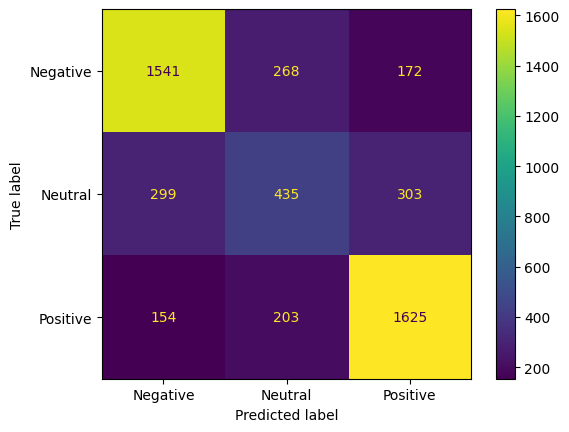

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot()